# Optimización de f(x,y) = 0.1·(exp(x²+y²) - tan(1.5·sin(x+y)))

## Descripción General del Método de Descenso del Gradiente

El **Método de Descenso del Gradiente** (también llamado *Gradient Descent*) es un algoritmo iterativo fundamental para optimización de funciones diferenciables $f:\mathbb{R}^n \to \mathbb{R}$.

La premisa fundamental es que el **gradiente** $\nabla f(\mathbf{x}_k)$ apunta en la dirección de *máximo ascenso*. Por lo tanto, moverse en la dirección del **gradiente negativo** $-\nabla f(\mathbf{x}_k)$ garantiza el *descenso* más rápido posible localmente.

Partiendo de un punto inicial $\mathbf{x}_0$, se genera una secuencia de puntos $\mathbf{x}_1, \mathbf{x}_2, \dots$ que se espera converja a un mínimo local.

### Fórmula del Método

En cada iteración $k$, el siguiente punto $\mathbf{x}_{k+1}$ se calcula mediante:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k \, \nabla f(\mathbf{x}_k)
$$

Donde:
- $\mathbf{x}_k \in \mathbb{R}^n$: punto actual en la iteración $k$.
- $\nabla f(\mathbf{x}_k)$: **gradiente** de $f$ en $\mathbf{x}_k$ (indica dirección de máximo ascenso).
- $-\nabla f(\mathbf{x}_k)$: **dirección de descenso**.
- $\alpha_k > 0$: **tamaño del paso** (learning rate).

### Procedimiento Básico

1. **Inicialización:** Escoger un punto inicial $\mathbf{x}_0$ y establecer criterio de parada (tolerancia $\epsilon$).
2. **Cálculo del Gradiente:** En la iteración $k$, calcular $\nabla f(\mathbf{x}_k)$.
3. **Criterio de Parada:** Si $\|\nabla f(\mathbf{x}_k)\| < \epsilon$, terminar.
4. **Determinación del Paso:** Elegir $\alpha_k > 0$ (fijo o mediante búsqueda de línea).
5. **Actualización:** Calcular $\mathbf{x}_{k+1}$ usando la fórmula.
6. **Repetir:** Incrementar $k \leftarrow k+1$ y volver al paso 2.

### Ventajas y Desventajas

**Ventajas:**
- Simplicidad conceptual y de implementación.
- Solo requiere el **gradiente** $\nabla f$, no la Hessiana.
- Escalable a alta dimensionalidad.

**Desventajas:**
- Convergencia puede ser muy lenta (especialmente con funciones mal condicionadas).
- Muy sensible a la elección de $\alpha$: muy grande → divergencia; muy pequeño → lentitud.
- Solo garantiza mínimo local, no global.

---

## Descripción General del Método Quasi-Newton (BFGS)

El **Método Quasi-Newton BFGS** (Broyden-Fletcher-Goldfarb-Shanno) es un algoritmo de optimización potente que usa información de **curvatura** mediante una aproximación a la matriz Hessiana, sin necesidad de calcularla explícitamente.

La función se aproxima localmente con una expansión de Taylor de segundo orden:

$$
f(\mathbf{x}) \approx f(\mathbf{x}_k) + \nabla f(\mathbf{x}_k)^T (\mathbf{x} - \mathbf{x}_k) + \tfrac{1}{2} (\mathbf{x} - \mathbf{x}_k)^T \, \mathbf{H}_f(\mathbf{x}_k) \, (\mathbf{x} - \mathbf{x}_k)
$$

### Fórmula del Método

En cada iteración $k$, se resuelve:

$$
B_k \, \mathbf{p}_k = -\nabla f(\mathbf{x}_k)
$$

donde $B_k$ es una aproximación a la matriz Hessiana $\nabla^2 f(\mathbf{x}_k)$, y $\mathbf{p}_k$ es la **dirección de búsqueda de Newton**.

Luego se actualiza:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \, \mathbf{p}_k
$$

donde $\alpha_k$ se elige mediante búsqueda de línea (p.ej. condición de Armijo).

Definimos:

$$
\mathbf{s}_k = \mathbf{x}_{k+1} - \mathbf{x}_k, \quad \mathbf{y}_k = \nabla f(\mathbf{x}_{k+1}) - \nabla f(\mathbf{x}_k).
$$

La actualización BFGS de la aproximación Hessiana es:

$$
B_{k+1} = B_k + \frac{\mathbf{y}_k \mathbf{y}_k^T}{\mathbf{y}_k^T \mathbf{s}_k} - \frac{B_k \mathbf{s}_k \mathbf{s}_k^T B_k}{\mathbf{s}_k^T B_k \mathbf{s}_k}.
$$

### Procedimiento Básico

1. **Inicialización:** Escoger $\mathbf{x}_0$, $B_0 = I$ (matriz identidad), $\epsilon$ (tolerancia).
2. **Cálculo:** Calcular $\nabla f(\mathbf{x}_k)$ y resolver $B_k \mathbf{p}_k = -\nabla f(\mathbf{x}_k)$.
3. **Criterio de Parada:** Si $\|\nabla f(\mathbf{x}_k)\| < \epsilon$, terminar.
4. **Búsqueda de Línea:** Encontrar $\alpha_k$ que cumpla la condición de Armijo (o similar).
5. **Actualización de x:** $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$.
6. **Actualización de B:** Calcular $\mathbf{s}_k$, $\mathbf{y}_k$ y actualizar $B_{k+1}$ si $\mathbf{y}_k^T \mathbf{s}_k > 0$.
7. **Repetir:** Incrementar $k \leftarrow k+1$ y volver al paso 2.

### Ventajas y Desventajas

**Ventajas:**
- **Convergencia Rápida:** Convergencia superlineal cerca de un mínimo local.
- **Eficiencia:** Típicamente requiere muchas menos iteraciones que el descenso del gradiente.
- **Sin Hessiana Explícita:** Solo requiere gradientes; evita el costo de calcular la matriz Hessiana completa.

**Desventajas:**
- **Costo por Iteración:** Mayor costo computacional por iteración (actualizar $B_k$, resolver sistema lineal).
- **Inestabilidad Potencial:** Si la aproximación $B_k$ se deteriora o los valores numéricos son problemáticos, el método puede fallar.
- **Condición $\mathbf{y}_k^T \mathbf{s}_k > 0$:** Si no se cumple, la aproximación puede perder propiedades deseables (definición positiva).

---

## Análisis Específico para nuestra Función

**Función objetivo:**
$$
f(x, y) = 0.1 \cdot (e^{x^2 + y^2} - \tan(1.5 \sin(x+y)))
$$

**Gradiente:**
$$
\nabla f = \begin{bmatrix} 0.1 \cdot (2x e^{x^2+y^2} - 1.5 \cos(x+y) \sec^2(1.5 \sin(x+y))) \\ 0.1 \cdot (2y e^{x^2+y^2} - 1.5 \cos(x+y) \sec^2(1.5 \sin(x+y))) \end{bmatrix}
$$

### Desafíos Numéricos
1. **Término exponencial:** $e^{x^2+y^2}$ crece muy rápido; puede causar overflow para $|x|$ o $|y|$ grandes.
2. **Función tangente:** $\tan(1.5 \sin(x+y))$ tiene singularidades en $\frac{\pi}{2} + k\pi$; puede divergir.
3. **Multimodalidad:** La función puede tener múltiples mínimos locales; la convergencia depende fuertemente de $\mathbf{x}_0$.
4. **Búsqueda de línea:** Es crítica una búsqueda de línea robusta para evitar pasos que generen NaN o infinito.

In [6]:
# Importaciones
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime
from pathlib import Path

# =====================================================================
# 1. DEFINICIÓN DE LA FUNCIÓN OBJETIVO Y SU GRADIENTE
# =====================================================================

def f(xy):
    """Función objetivo f(x, y)."""
    x, y = xy
    return 0.1 * (np.exp(x**2 + y**2) - np.tan(1.5 * np.sin(x + y)))

def grad_f(xy):
    """Gradiente de f(x, y) = [df/dx, df/dy]."""
    x, y = xy
    exp_term = np.exp(x**2 + y**2)
    trig_term = np.cos(x + y) * (1 / np.cos(1.5 * np.sin(x + y)))**2
    dfdx = 0.1 * (2 * x * exp_term - 1.5 * trig_term)
    dfdy = 0.1 * (2 * y * exp_term - 1.5 * trig_term)
    return np.array([dfdx, dfdy])

# =====================================================================
# 2. DESCENSO DEL GRADIENTE
# =====================================================================

def gradient_descent(f, grad_f, x0, alpha=1e-3, tol=1e-6, max_iter=10000):
    """Implementación del descenso del gradiente con paso fijo.
    
    Parámetros:
    -----------
    f : callable
        Función objetivo.
    grad_f : callable
        Función que retorna el gradiente.
    x0 : array-like
        Punto inicial.
    alpha : float
        Tamaño de paso (learning rate).
    tol : float
        Tolerancia para criterio de parada.
    max_iter : int
        Número máximo de iteraciones.
    
    Retorna:
    --------
    x : ndarray
        Punto final aproximado.
    f_x : float
        Valor de la función en el punto final.
    it : int
        Número de iteraciones realizadas.
    path : ndarray
        Trayectoria de iterados.
    """
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    
    for i in range(max_iter):
        g = grad_f(x)
        
        # Verificar finitud
        if not np.all(np.isfinite(g)):
            break
        
        if np.linalg.norm(g) < tol:
            break
        
        x -= alpha * g
        
        # Verificar que x sigue siendo finito
        if not np.all(np.isfinite(x)):
            break
        
        path.append(x.copy())
    
    f_x = f(x)
    return x, f_x, i+1, np.array(path)

# =====================================================================
# 3. MÉTODO QUASI-NEWTON (BFGS)
# =====================================================================

def quasi_newton_bfgs(f, grad_f, x0, tol=1e-6, max_iter=1000):
    """Implementación del método Quasi-Newton BFGS.
    
    Parámetros:
    -----------
    f : callable
        Función objetivo.
    grad_f : callable
        Función que retorna el gradiente.
    x0 : array-like
        Punto inicial.
    tol : float
        Tolerancia para criterio de parada.
    max_iter : int
        Número máximo de iteraciones.
    
    Retorna:
    --------
    x : ndarray
        Punto final aproximado.
    f_x : float
        Valor de la función en el punto final.
    it : int
        Número de iteraciones realizadas.
    path : ndarray
        Trayectoria de iterados.
    """
    x = np.array(x0, dtype=float)
    n = len(x)
    B = np.eye(n)
    path = [x.copy()]
    
    for k in range(max_iter):
        g = grad_f(x)
        
        if not np.all(np.isfinite(g)):
            break
        
        if np.linalg.norm(g) < tol:
            break
        
        # Dirección de búsqueda
        try:
            p = -np.linalg.solve(B, g)
        except np.linalg.LinAlgError:
            break
        
        # Búsqueda de línea (Armijo)
        alpha = 1.0
        f_x = f(x)
        c = 1e-4
        while f(x + alpha*p) > f_x + c * alpha * np.dot(g, p) and alpha > 1e-8:
            alpha *= 0.5
        
        x_new = x + alpha * p
        
        if not np.all(np.isfinite(x_new)):
            break
        
        s = x_new - x
        y = grad_f(x_new) - g
        
        # Actualización BFGS solo si se cumple la condición de curvatura
        if np.dot(y, s) > 1e-10:
            Bs = B @ s
            B += np.outer(y, y) / np.dot(y, s) - np.outer(Bs, Bs) / np.dot(s, Bs)
        
        x = x_new
        path.append(x.copy())
    
    f_x = f(x)
    return x, f_x, k+1, np.array(path)

# =====================================================================
# 4. FUNCIÓN PARA GUARDAR RESULTADOS
# =====================================================================

def save_results(resultados, nombre_archivo="resultados.json"):
    """Guarda resultados en formato JSON."""
    with open(nombre_archivo, "w") as f:
        json.dump(resultados, f, indent=4)
    print(f"✅ Resultados guardados en {Path(nombre_archivo).absolute()}")

# Ejecución de Experimentos

In [7]:
print("Iniciando experimentos...\n")

# Configuración de experimentos (rango pequeño para evitar overflow)
# Generamos una cuadrícula de puntos en [-2, 2] con paso 1
coords = [-2, -1, 0, 1, 2]
puntos_iniciales = [(i, j) for i in coords for j in coords]

# Learning rates moderados para evitar saltos grandes
learning_rates = [0.005, 0.01, 0.05]
# Número de pasos contenido para no alargar demasiado la ejecución
pasos_list = [50, 150]

resultados_experimentos = []

def safe_gradient_descent(x0, lr, pasos):
    try:
        x_star, f_x, it, path = gradient_descent(f, grad_f, np.array(x0), alpha=lr, max_iter=pasos)
        if not np.isfinite(f_x) or np.any(np.isnan(path)):
            raise ValueError("Valor no finito detectado")
        return {"trayectoria": path.tolist(), "ultimo": x_star.tolist(), "valor": float(f_x), "iteraciones": int(it)}
    except Exception as e:
        return {"error": str(e)}

def safe_bfgs(x0, pasos):
    try:
        x_star, f_x, it, path = quasi_newton_bfgs(f, grad_f, np.array(x0), max_iter=pasos)
        if not np.isfinite(f_x) or np.any(np.isnan(path)):
            raise ValueError("Valor no finito detectado")
        return {"trayectoria": path.tolist(), "ultimo": x_star.tolist(), "valor": float(f_x), "iteraciones": int(it)}
    except Exception as e:
        return {"error": str(e)}

# Ejecutar combinaciones
for x0 in puntos_iniciales:
    # Descenso del gradiente con diferentes lr
    for lr in learning_rates:
        for pasos in pasos_list:
            entry = {
                "fecha": datetime.now().isoformat(),
                "algoritmo": "gradiente",
                "x0": list(x0),
                "lr": lr,
                "pasos_max": pasos,
            }
            res = safe_gradient_descent(x0, lr, pasos)
            entry.update(res)
            resultados_experimentos.append(entry)
    
    # BFGS (no usa lr)
    for pasos in pasos_list:
        entry = {
            "fecha": datetime.now().isoformat(),
            "algoritmo": "bfgs",
            "x0": list(x0),
            "pasos_max": pasos,
        }
        res = safe_bfgs(x0, pasos)
        entry.update(res)
        resultados_experimentos.append(entry)

# Guardar todos los experimentos en un JSON
payload = {
    "generado_en": datetime.now().isoformat(),
    "funcion": "f(x,y) = 0.1*(exp(x²+y²) - tan(1.5*sin(x+y)))",
    "num_experimentos": len(resultados_experimentos),
    "experimentos": resultados_experimentos,
}

filename = "resultados_experimentos.json"
save_results(payload, filename)

# Resumen rápido
print(f"\nSe ejecutaron {len(resultados_experimentos)} experimentos.")
errores = sum(1 for r in resultados_experimentos if r.get("error") is not None)
print(f"Entradas con error: {errores}")

Iniciando experimentos...



/tmp/ipykernel_65965/2368329140.py:20: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(x**2 + y**2)
/tmp/ipykernel_65965/2368329140.py:15: RuntimeWarning: overflow encountered in exp
  return 0.1 * (np.exp(x**2 + y**2) - np.tan(1.5 * np.sin(x + y)))


✅ Resultados guardados en /media/frank/Nuevo vol/3r Año/Modelos de Optimizacion/Tarea Evaluativa/resultados_experimentos.json

Se ejecutaron 200 experimentos.
Entradas con error: 24


# Análisis de Resultados en Tabla

In [8]:
import pandas as pd

# Leer resultados del JSON
with open("resultados_experimentos.json", "r") as archivo:
    datos = json.load(archivo)

resultados = datos["experimentos"]

# Construir tabla
filas = []
for r in resultados:
    fila = {
        "algoritmo": r["algoritmo"],
        "x0_x": r["x0"][0],
        "x0_y": r["x0"][1],
        "lr": r.get("lr", "-"),
        "pasos_max": r["pasos_max"],
        "pasos_realizados": len(r.get("trayectoria", [])),
        "x_final_x": r.get("ultimo", [None, None])[0] if "ultimo" in r else None,
        "x_final_y": r.get("ultimo", [None, None])[1] if "ultimo" in r else None,
        "valor_final": r.get("valor", None),
        "error": r.get("error", "-")
    }
    filas.append(fila)

df = pd.DataFrame(filas)

# Ordenar por valor final (mejores primero)
df_sorted = df.sort_values("valor_final", ascending=True, na_position='last').reset_index(drop=True)

print(f"\nTotal de experimentos: {len(df)}\n")
print("=" * 120)
print("MEJORES RESULTADOS (Top 15):")
print("=" * 120)
display(df_sorted.head(15))

print("\n" + "=" * 120)
print("PEORES RESULTADOS (Bottom 10):")
print("=" * 120)
display(df_sorted.tail(10))


Total de experimentos: 200

MEJORES RESULTADOS (Top 15):


,algoritmo,x0_x,x0_y,lr,pasos_max,pasos_realizados,x_final_x,x_final_y,valor_final,error
0,bfgs,2,1,-,50,18,0.776684,0.776684,-1.071435,-
1,bfgs,2,1,-,150,18,0.776684,0.776684,-1.071435,-
2,bfgs,1,2,-,150,18,0.776684,0.776684,-1.071435,-
3,bfgs,1,2,-,50,18,0.776684,0.776684,-1.071435,-
4,bfgs,0,0,-,50,9,0.776684,0.776684,-1.071435,-
5,bfgs,0,0,-,150,9,0.776684,0.776684,-1.071435,-
6,bfgs,-2,2,-,150,16,0.776684,0.776684,-1.071435,-
7,bfgs,-2,2,-,50,16,0.776684,0.776684,-1.071435,-
8,bfgs,2,-2,-,150,16,0.776684,0.776684,-1.071435,-
9,bfgs,2,-2,-,50,16,0.776684,0.776684,-1.071435,-



PEORES RESULTADOS (Bottom 10):


,algoritmo,x0_x,x0_y,lr,pasos_max,pasos_realizados,x_final_x,x_final_y,valor_final,error
190,gradiente,2,-2,0.01,50,0,NaN,NaN,NaN,Valor no finito detectado
191,gradiente,2,-2,0.01,150,0,NaN,NaN,NaN,Valor no finito detectado
192,gradiente,2,-2,0.05,50,0,NaN,NaN,NaN,Valor no finito detectado
193,gradiente,2,-2,0.05,150,0,NaN,NaN,NaN,Valor no finito detectado
194,gradiente,2,2,0.005,50,0,NaN,NaN,NaN,Valor no finito detectado
195,gradiente,2,2,0.005,150,0,NaN,NaN,NaN,Valor no finito detectado
196,gradiente,2,2,0.01,50,0,NaN,NaN,NaN,Valor no finito detectado
197,gradiente,2,2,0.01,150,0,NaN,NaN,NaN,Valor no finito detectado
198,gradiente,2,2,0.05,50,0,NaN,NaN,NaN,Valor no finito detectado
199,gradiente,2,2,0.05,150,0,NaN,NaN,NaN,Valor no finito detectado


# Visualización Interactiva de Casos Específicos

In [9]:
# Visualizar la función en un dominio pequeño para evitar overflow
x_vals = np.linspace(-2, 2, 200)
y_vals = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x_vals, y_vals)

try:
    Z = np.array([[f([x, y]) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
except:
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            try:
                Z[i, j] = f([X[i, j], Y[i, j]])
            except:
                Z[i, j] = np.nan

print("Función visualizada en el rango [-2, 2] x [-2, 2] para evitar overflow.")

Función visualizada en el rango [-2, 2] x [-2, 2] para evitar overflow.



[Visualizaciones automáticas de múltiples casos en rango pequeño]

Gradiente: x0=(-2, -2), lr=0.01, pasos_max=150
Error en este caso: Valor no finito detectado
Gradiente: x0=(-2, -2), lr=0.05, pasos_max=150
Error en este caso: Valor no finito detectado
Gradiente: x0=(-2, 0), lr=0.01, pasos_max=150


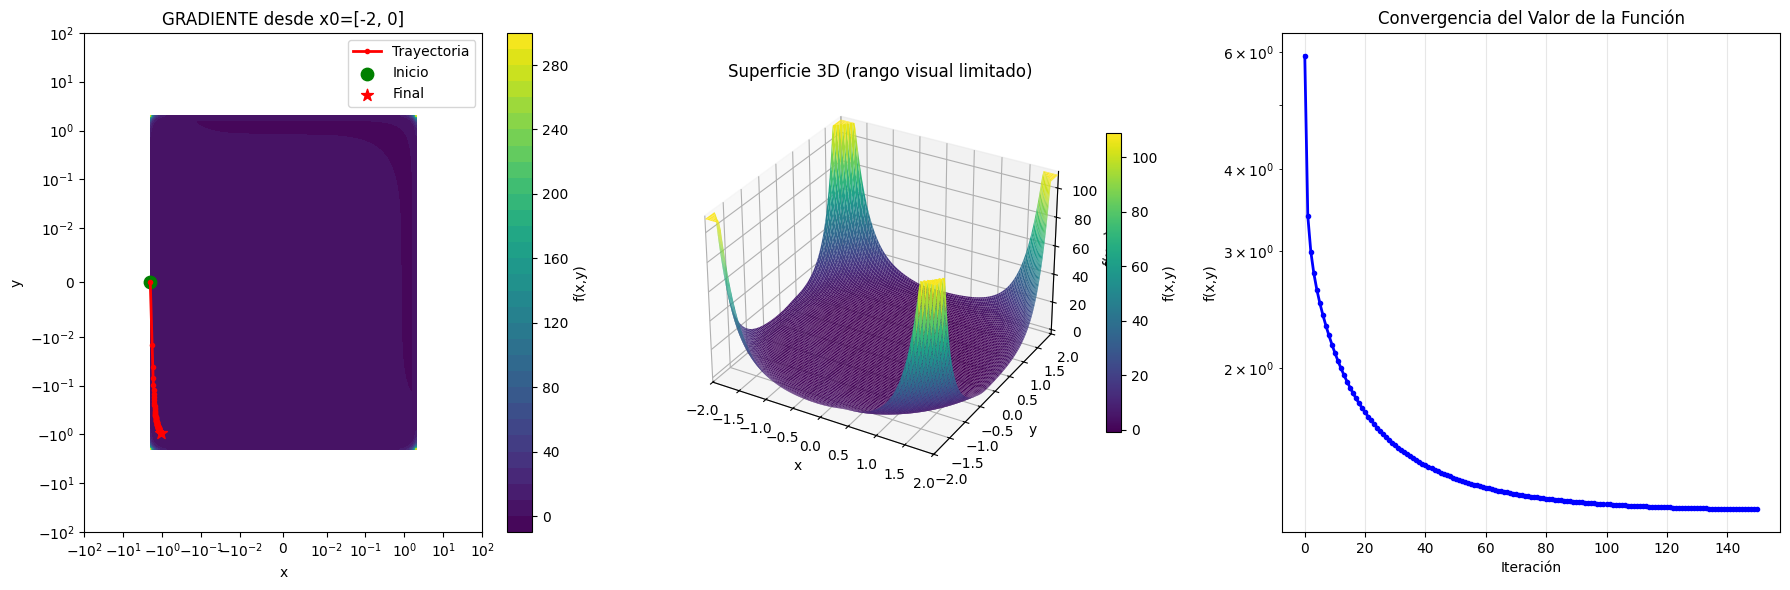


Algoritmo: GRADIENTE
Punto inicial x0: [-2, 0]
Learning rate: 0.01
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [-1.0639625723721395, -0.9346760335658515]
Valor final f(x*): 1.2216283735010882

Gradiente: x0=(-2, 0), lr=0.05, pasos_max=150


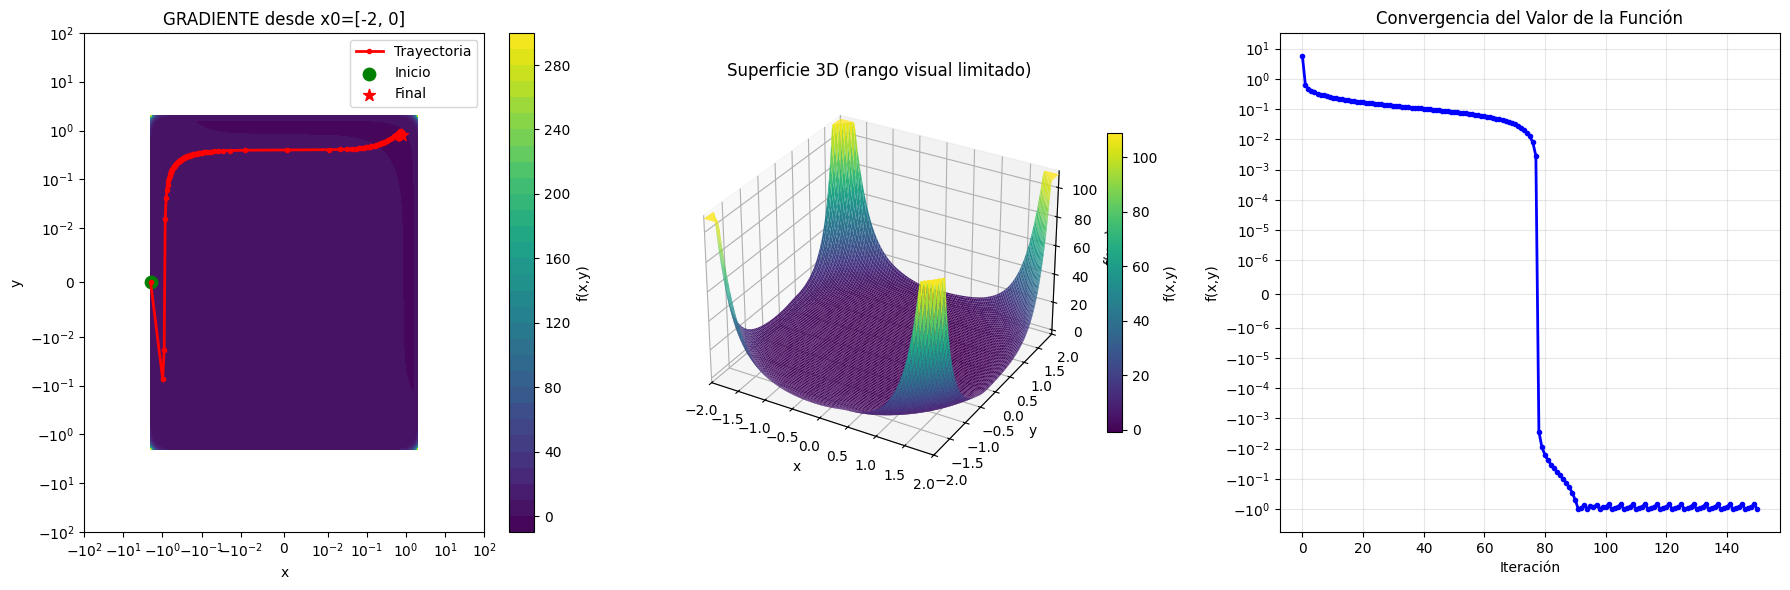


Algoritmo: GRADIENTE
Punto inicial x0: [-2, 0]
Learning rate: 0.05
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.7853347469965803, 0.8226330099919833]
Valor final f(x*): -1.0251888842205676

Gradiente: x0=(0, 0), lr=0.01, pasos_max=150


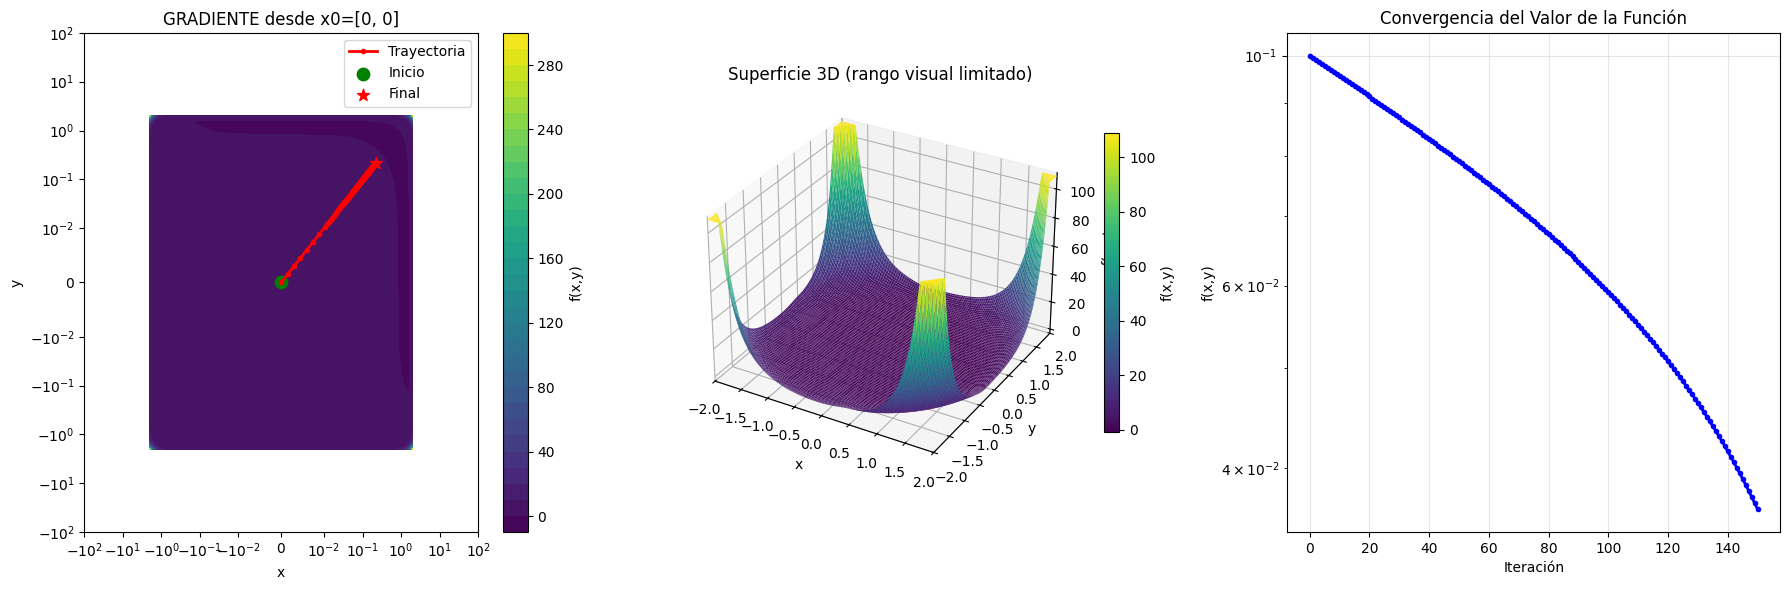


Algoritmo: GRADIENTE
Punto inicial x0: [0, 0]
Learning rate: 0.01
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.21805215928527472, 0.21805215928527472]
Valor final f(x*): 0.03650917795760198

Gradiente: x0=(0, 0), lr=0.05, pasos_max=150


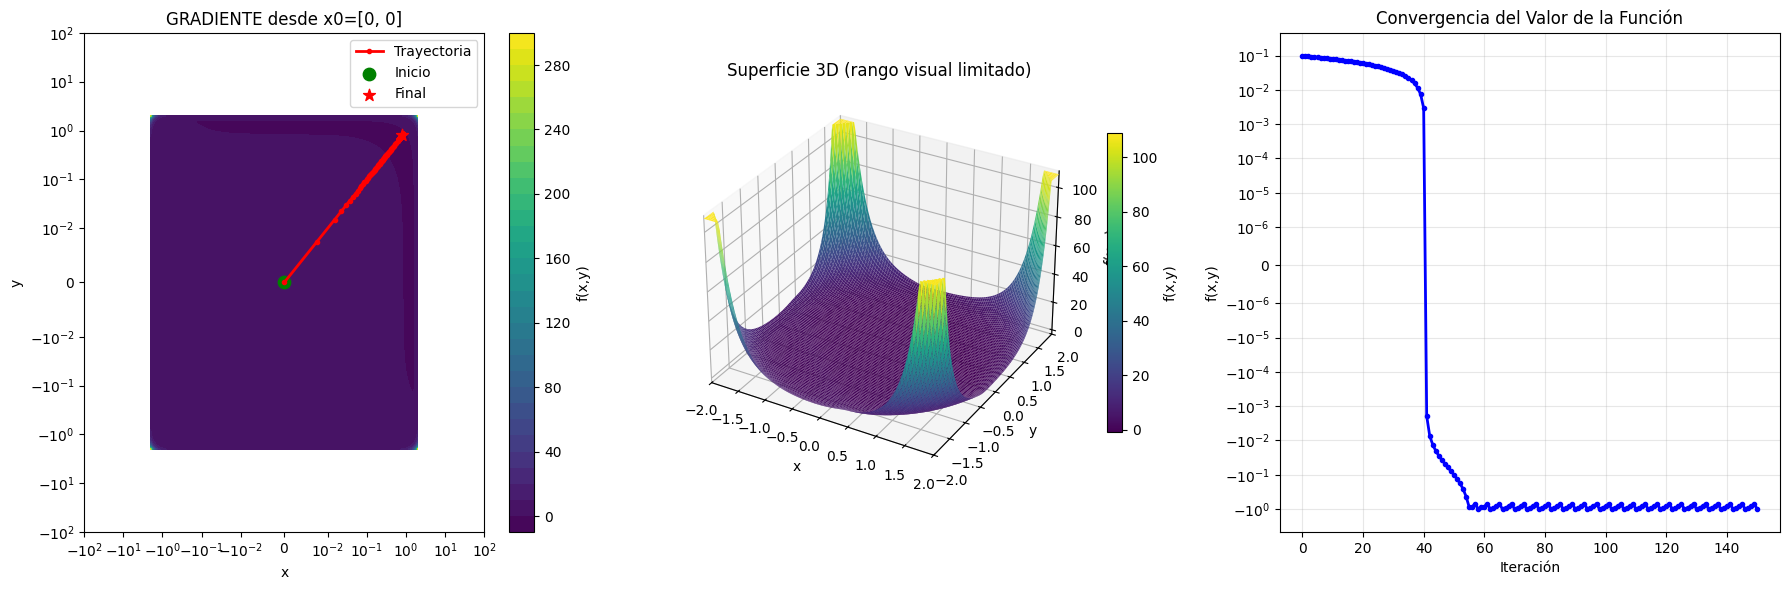


Algoritmo: GRADIENTE
Punto inicial x0: [0, 0]
Learning rate: 0.05
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.8040265450070523, 0.8040265450070523]
Valor final f(x*): -1.0252999284630517

Gradiente: x0=(1, -1), lr=0.01, pasos_max=150


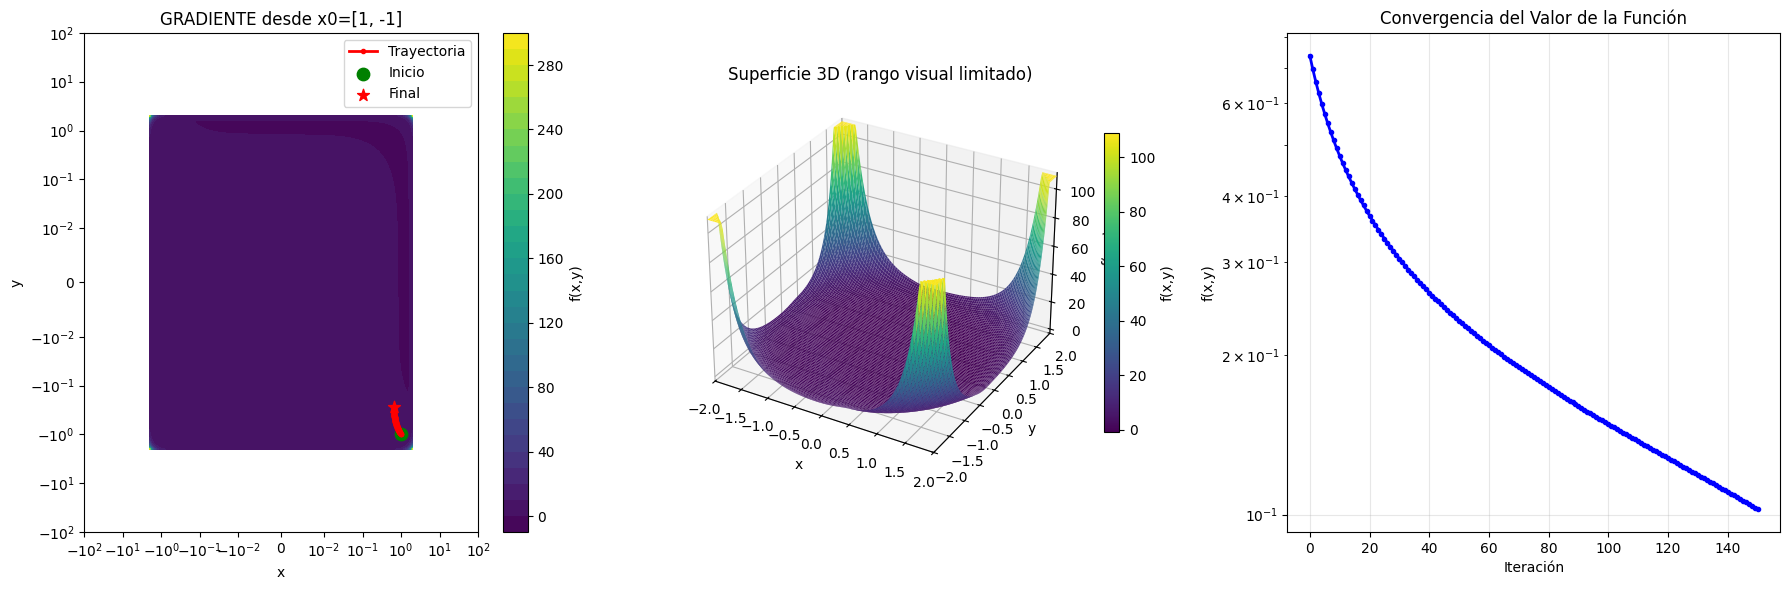


Algoritmo: GRADIENTE
Punto inicial x0: [1, -1]
Learning rate: 0.01
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.6463427666243485, -0.271521200236994]
Valor final f(x*): 0.102278861798599

Gradiente: x0=(1, -1), lr=0.05, pasos_max=150


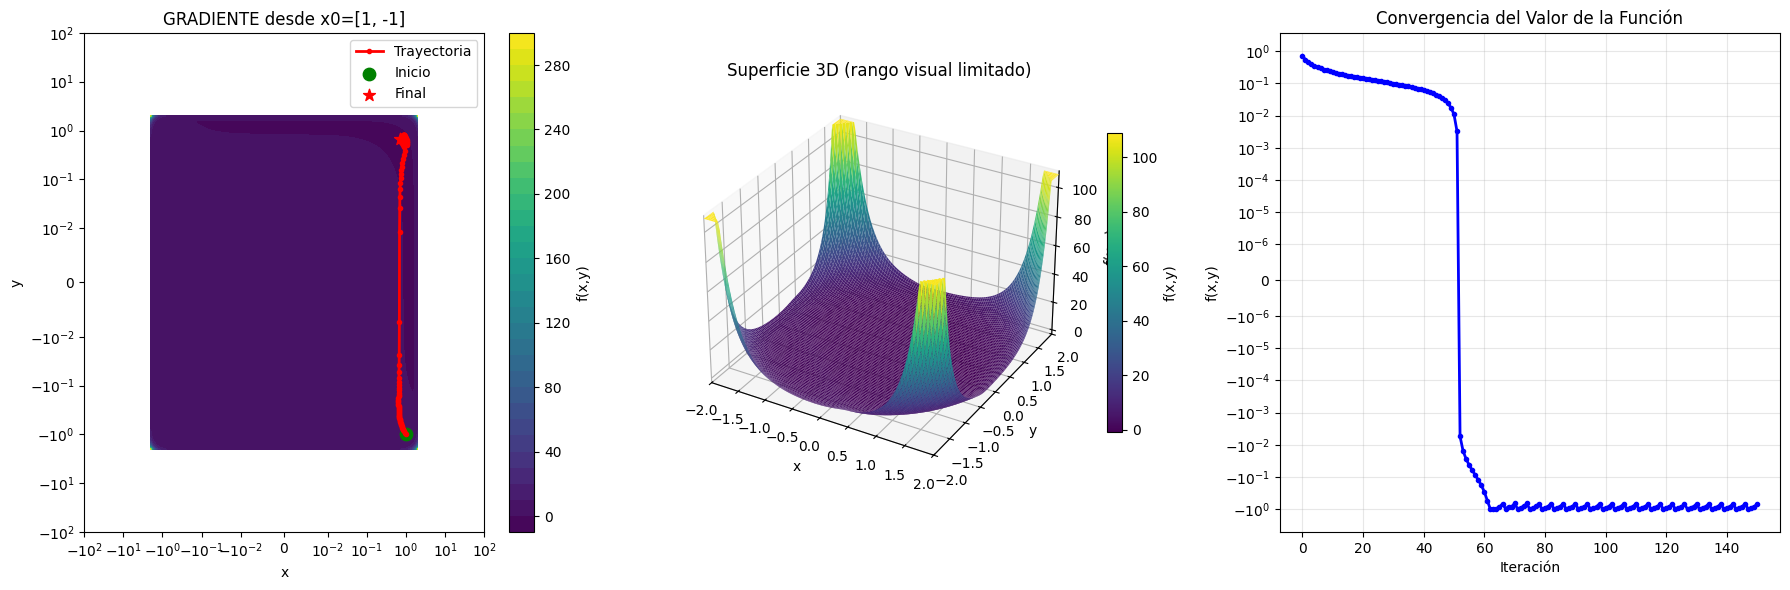


Algoritmo: GRADIENTE
Punto inicial x0: [1, -1]
Learning rate: 0.05
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.689757673909794, 0.6636273240601578]
Valor final f(x*): -0.6889303095872199

Gradiente: x0=(2, 1), lr=0.01, pasos_max=150


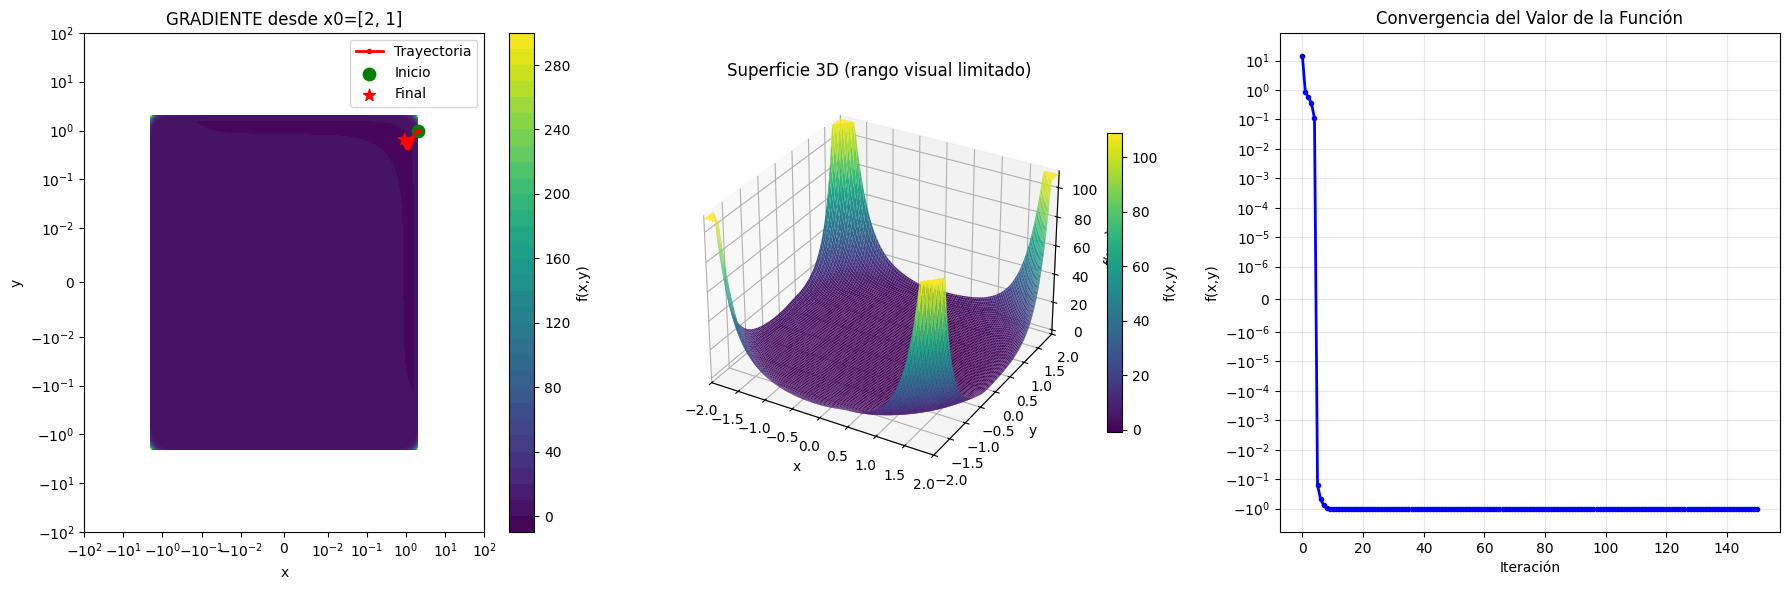


Algoritmo: GRADIENTE
Punto inicial x0: [2, 1]
Learning rate: 0.01
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.888286206579713, 0.6646417328040498]
Valor final f(x*): -1.062975518140778

Gradiente: x0=(2, 1), lr=0.05, pasos_max=150


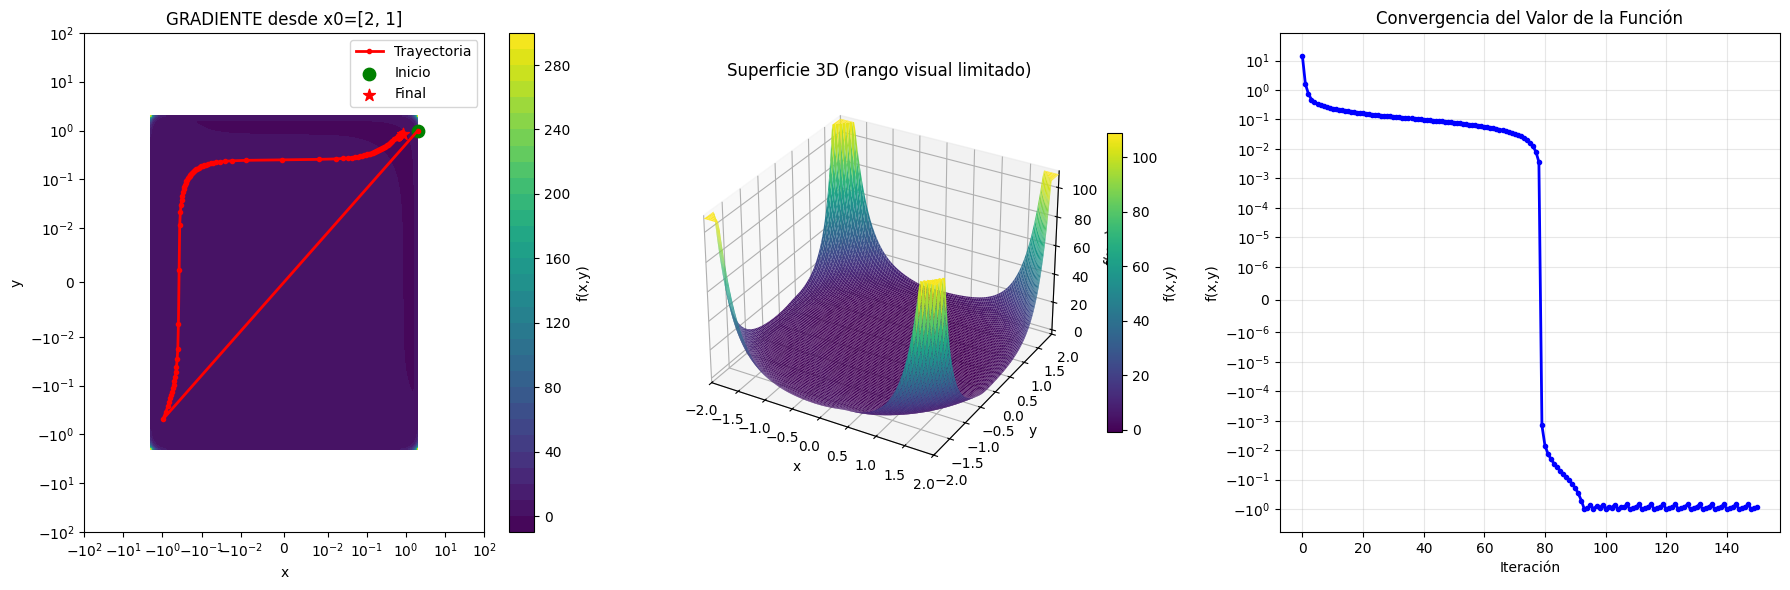


Algoritmo: GRADIENTE
Punto inicial x0: [2, 1]
Learning rate: 0.05
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.8283996036864223, 0.8515775806274717]
Valor final f(x*): -0.8414272248881673

BFGS: x0=(-2, -2), pasos_max=150


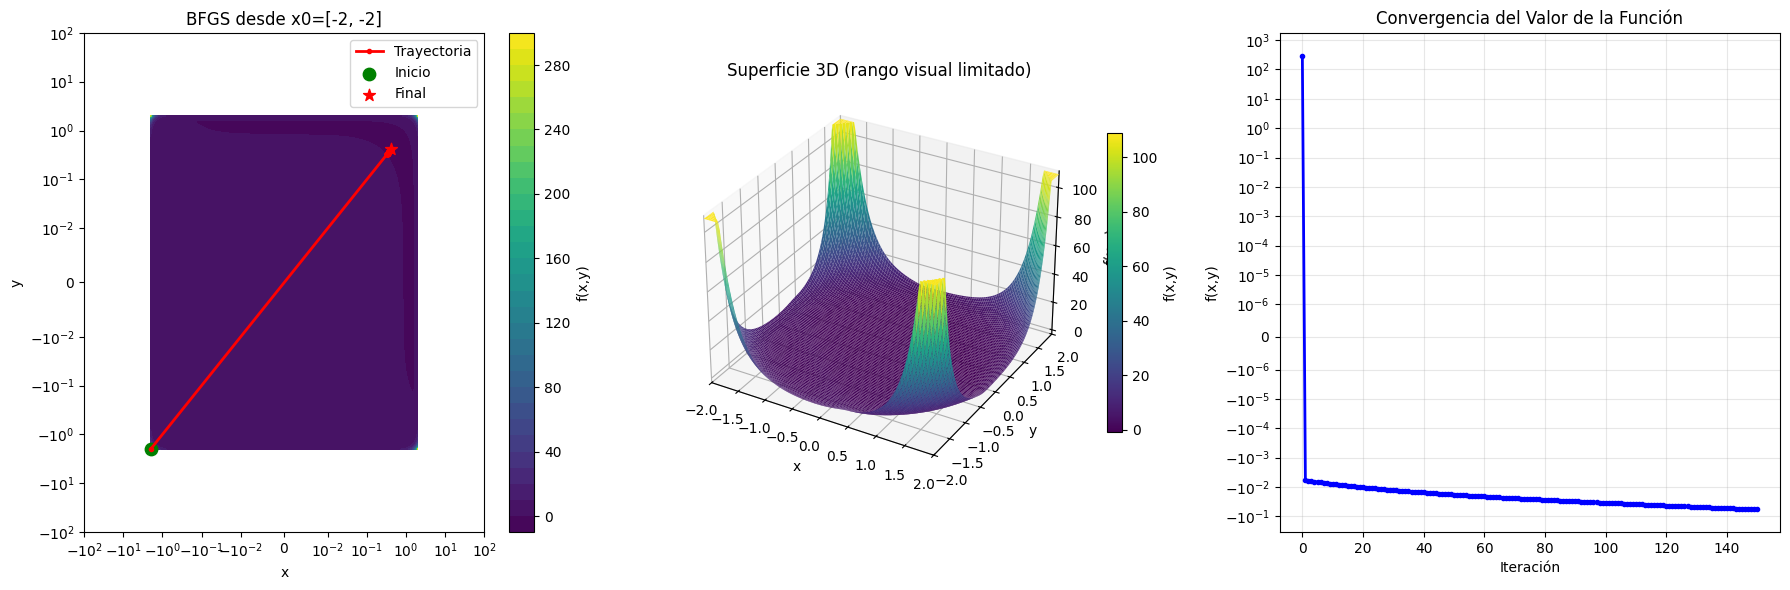


Algoritmo: BFGS
Punto inicial x0: [-2, -2]
Pasos máximos: 150
Pasos realizados: 151
Punto final x*: [0.4139571869238353, 0.4139571869238353]
Valor final f(x*): -0.05794529837368703

BFGS: x0=(-2, 0), pasos_max=150


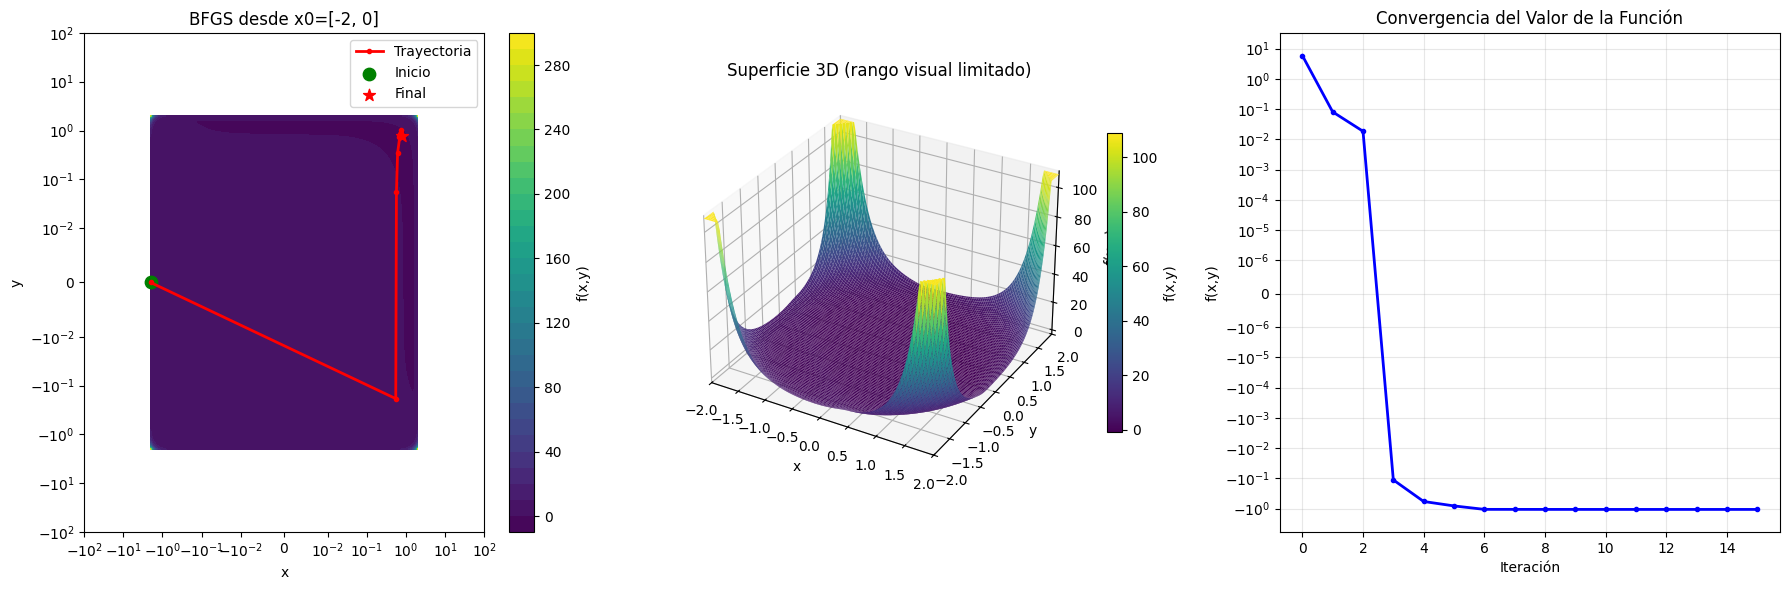


Algoritmo: BFGS
Punto inicial x0: [-2, 0]
Pasos máximos: 150
Pasos realizados: 16
Punto final x*: [0.7766840664438576, 0.7766840624049874]
Valor final f(x*): -1.0714351043183188

BFGS: x0=(0, 0), pasos_max=150


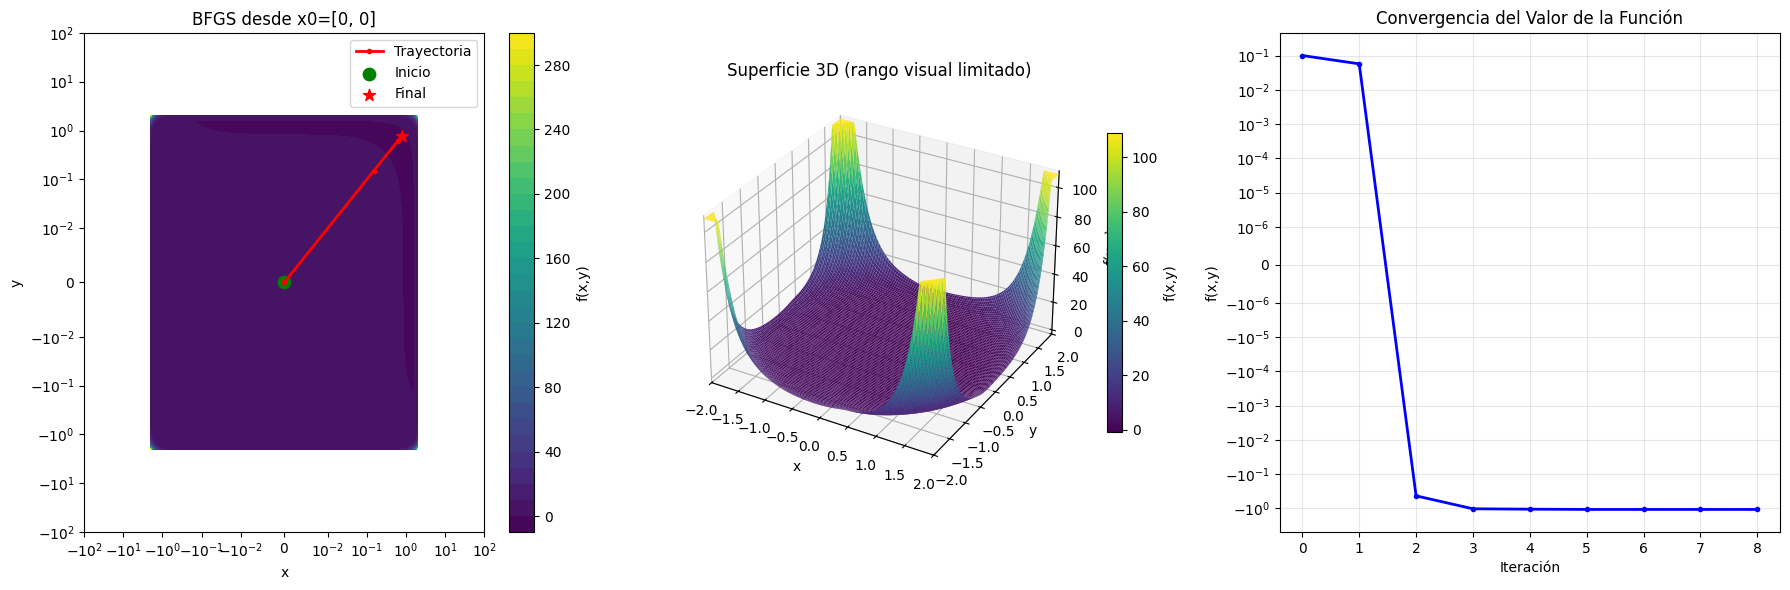


Algoritmo: BFGS
Punto inicial x0: [0, 0]
Pasos máximos: 150
Pasos realizados: 9
Punto final x*: [0.7766840632857755, 0.7766840632857755]
Valor final f(x*): -1.0714351043183206

BFGS: x0=(1, -1), pasos_max=150


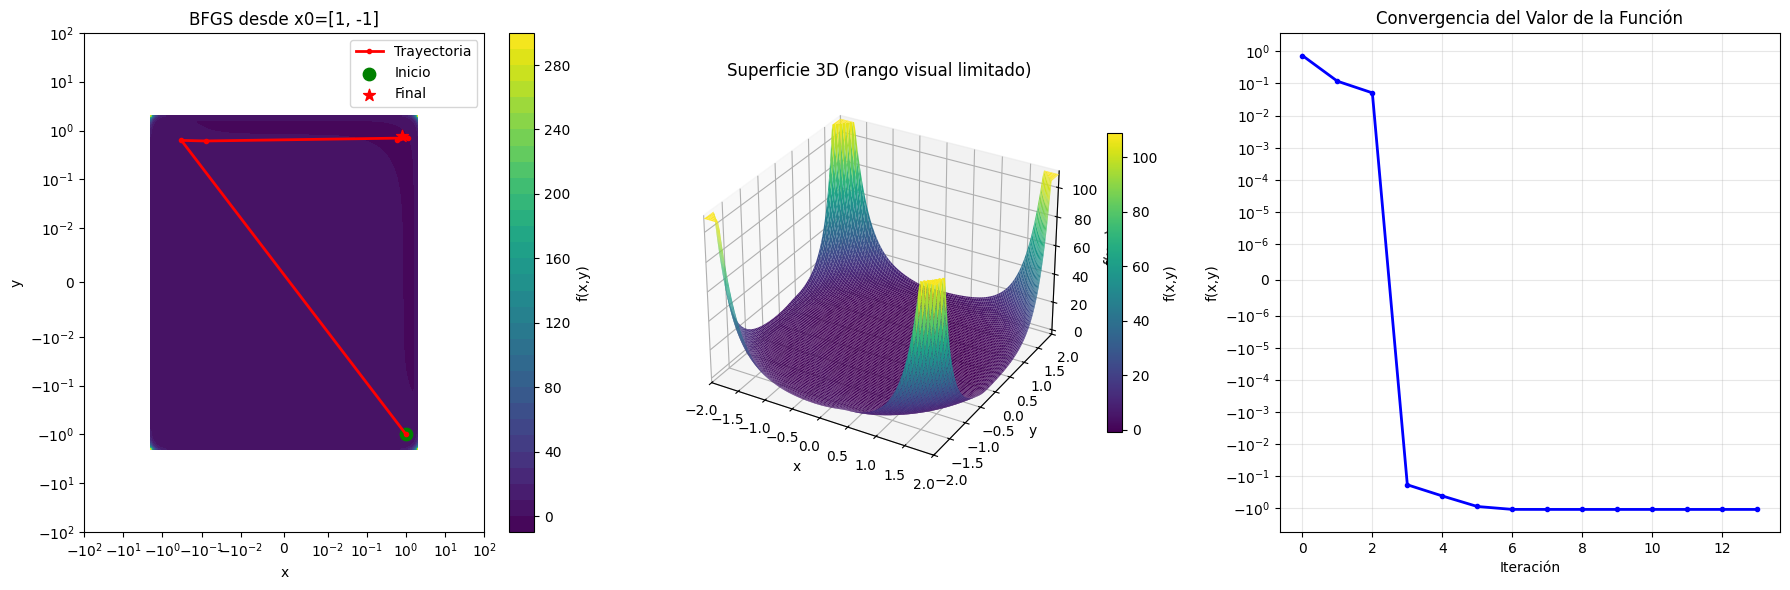


Algoritmo: BFGS
Punto inicial x0: [1, -1]
Pasos máximos: 150
Pasos realizados: 14
Punto final x*: [0.7766840314307224, 0.7766840950299008]
Valor final f(x*): -1.0714351043183172

BFGS: x0=(2, 1), pasos_max=150


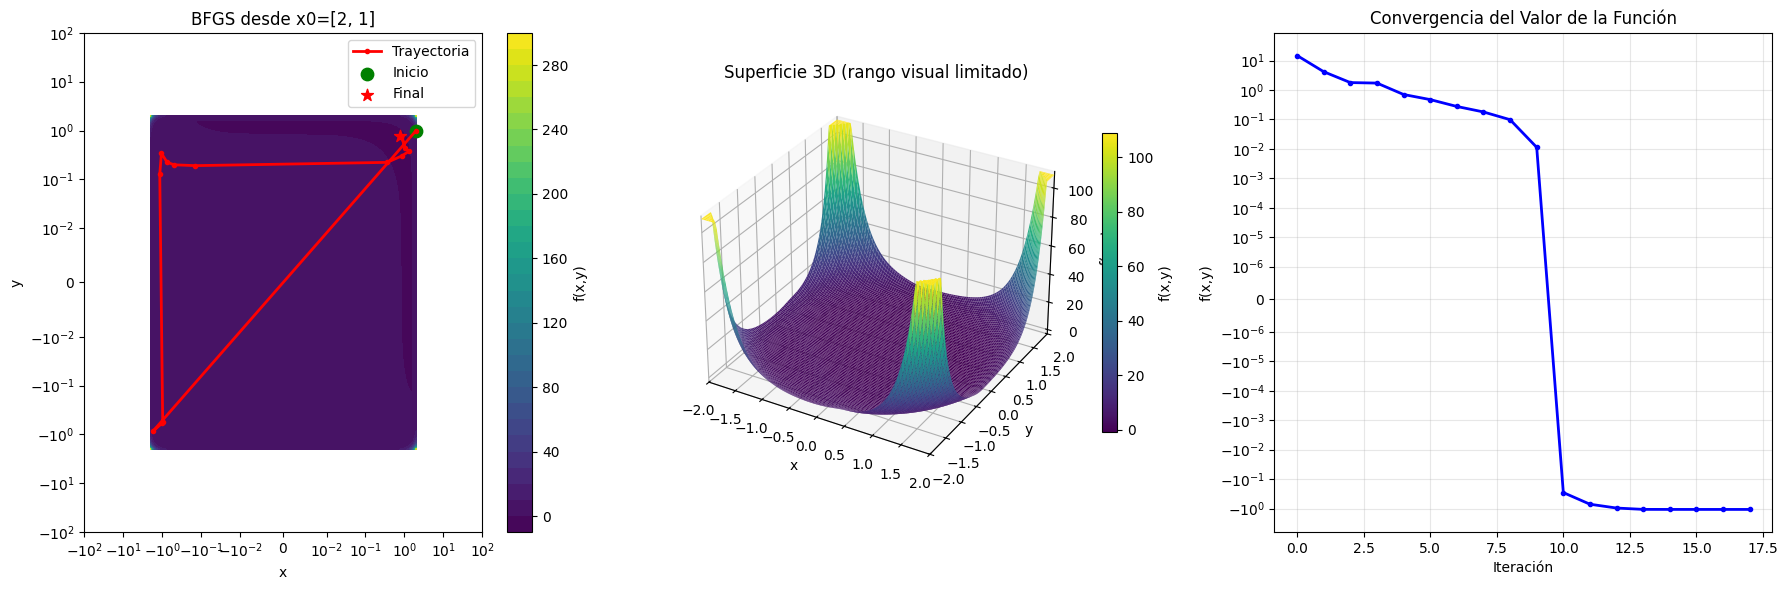


Algoritmo: BFGS
Punto inicial x0: [2, 1]
Pasos máximos: 150
Pasos realizados: 18
Punto final x*: [0.7766840618039359, 0.7766840683377599]
Valor final f(x*): -1.0714351043183215



In [13]:
def visualize_case(algoritmo, x0, lr=None, pasos_max=None):
    """Visualiza un caso específico con contorno 2D, superficie 3D y convergencia."""
    from mpl_toolkits.mplot3d import Axes3D  # import local para evitar errores si no se usa
    # Buscar el caso en resultados
    casos = [r for r in resultados if r['algoritmo'] == algoritmo and r['x0'] == x0]
    if lr is not None:
        casos = [r for r in casos if r.get('lr') == lr]
    if pasos_max is not None:
        casos = [r for r in casos if r.get('pasos_max') == pasos_max]

    if not casos:
        print(f"No se encontró caso para {algoritmo}, x0={x0}, lr={lr}, pasos_max={pasos_max}")
        return

    caso = casos[0]
    if "error" in caso:
        print(f"Error en este caso: {caso['error']}")
        return

    trayectoria = np.array(caso['trayectoria'])

    # Figura con 3 subplots: 2D contorno | 3D superficie | convergencia
    fig = plt.figure(figsize=(18, 6))

    # Subplot 1: Contour 2D
    ax1 = fig.add_subplot(1, 3, 1)
    cp = ax1.contourf(X, Y, Z, levels=30, cmap='viridis')
    fig.colorbar(cp, ax=ax1, label='f(x,y)')
    ax1.set_xscale('symlog', linthresh=1e-2)
    ax1.set_yscale('symlog', linthresh=1e-2)
    ax1.set_xlim([-100, 100])
    ax1.set_ylim([-100, 100])
    if trayectoria.size:
        ax1.plot(trayectoria[:, 0], trayectoria[:, 1], 'r.-', markersize=6, linewidth=2, label='Trayectoria')
        ax1.scatter(trayectoria[0, 0], trayectoria[0, 1], c='green', s=80, marker='o', label='Inicio')
        ax1.scatter(trayectoria[-1, 0], trayectoria[-1, 1], c='red', s=80, marker='*', label='Final')
    ax1.set_xlabel('x'); ax1.set_ylabel('y')
    ax1.set_title(f"{caso['algoritmo'].upper()} desde x0={caso['x0']}")
    ax1.legend()

    # Subplot 2: Superficie 3D (mejor manejo del "rango visual limitado")
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    Z_plot = np.array(Z, copy=True)
    finite_mask = np.isfinite(Z_plot)
    if finite_mask.any():
        fill_value = np.nanmean(Z_plot[finite_mask])
    else:
        fill_value = 0.0
    Z_safe = np.nan_to_num(Z_plot, nan=fill_value, posinf=fill_value, neginf=fill_value)

    # Limitar ejes a la malla real
    ax2.set_xlim(X.min(), X.max())
    ax2.set_ylim(Y.min(), Y.max())

    # Recortar Z para evitar que pocos picos dominen la escala (usar percentiles)
    finite_z = Z_safe[np.isfinite(Z_safe)]
    if finite_z.size:
        z_lo, z_hi = np.percentile(finite_z, [1, 99])
        Z_clip = np.clip(Z_safe, z_lo, z_hi)
        vmin, vmax = z_lo, z_hi
    else:
        Z_clip = Z_safe
        vmin, vmax = None, None

    try:
        from matplotlib import cm
        surf = ax2.plot_surface(X, Y, Z_clip, cmap='viridis', linewidth=0, antialiased=True,
                                rcount=100, ccount=100, vmin=vmin, vmax=vmax)
        fig.colorbar(surf, ax=ax2, shrink=0.6, pad=0.06, label='f(x,y)')
    except Exception:
        ax2.plot_wireframe(X, Y, Z_clip, rcount=50, ccount=50)
    ax2.set_xlabel('x'); ax2.set_ylabel('y'); ax2.set_zlabel('f(x,y)')
    ax2.set_title('Superficie 3D (rango visual limitado)')

    # Subplot 3: Convergencia (valor vs iteración)
    ax3 = fig.add_subplot(1, 3, 3)
    valores = []
    for t in trayectoria:
        try:
            valores.append(float(f([t[0], t[1]])))
        except Exception:
            valores.append(np.nan)
    # Visualizar con semilogy si todos >0 finitos, si no usar symlog
    if valores and all(np.isfinite(v) and v > 0 for v in valores):
        ax3.semilogy(range(len(valores)), valores, 'b.-', linewidth=2, markersize=6)
    else:
        ax3.set_yscale('symlog', linthresh=1e-6)
        ax3.plot(range(len(valores)), valores, 'b.-', linewidth=2, markersize=6)
    ax3.set_xlabel('Iteración'); ax3.set_ylabel('f(x,y)')
    ax3.set_title('Convergencia del Valor de la Función')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Imprimir información del caso
    print(f"\n{'='*60}")
    print(f"Algoritmo: {caso['algoritmo'].upper()}")
    print(f"Punto inicial x0: {caso['x0']}")
    if 'lr' in caso:
        print(f"Learning rate: {caso['lr']}")
    print(f"Pasos máximos: {caso['pasos_max']}")
    print(f"Pasos realizados: {len(trayectoria)}")
    print(f"Punto final x*: {caso.get('ultimo')}")
    print(f"Valor final f(x*): {caso.get('valor')}")
    print(f"{'='*60}\n")

# Visualizaciones en lote (ciclos) con números pequeños para evitar overflow
print("\n[Visualizaciones automáticas de múltiples casos en rango pequeño]\n")

# Selección de puntos de muestra y parámetros prudentes
puntos_muestra = [(-2, -2), (-2, 0), (0, 0), (1, -1), (2, 1)]
learning_rates_vis = [0.01, 0.05]
pasos_vis = 150

# Gradiente: múltiples lrs por cada punto
for x0 in puntos_muestra:
    for lr in learning_rates_vis:
        print(f"Gradiente: x0={x0}, lr={lr}, pasos_max={pasos_vis}")
        visualize_case('gradiente', list(x0), lr=lr, pasos_max=pasos_vis)

# BFGS: un caso por cada punto
for x0 in puntos_muestra:
    print(f"BFGS: x0={x0}, pasos_max={pasos_vis}")
    visualize_case('bfgs', list(x0), pasos_max=pasos_vis)

# Conclusiones y Observaciones

## Análisis Comparativo

### Desempeño del Descenso del Gradiente
- **Robustez:** Menos propenso a fallar; depende principalmente de elegir un lr adecuado.
- **Velocidad:** Convergencia más lenta; típicamente requiere más iteraciones.
- **Sensibilidad de lr:** Muy crítica; valores demasiado grandes pueden diverger; muy pequeños son ineficientes.

### Desempeño del Método BFGS
- **Eficiencia:** Generalmente converge en menos iteraciones.
- **Robustez:** Sensible al punto inicial y a problemas numéricos (Hessiana singular, curvatura nula).
- **Costo:** Mayor por iteración pero compensa con menos iteraciones.

### Desafíos Numéricos Observados
1. **Overflow en función exponencial:** Con puntos iniciales lejanos del origen.
2. **Singularidades de tan():** Puede hacer que gradientes o valores sean infinitos.
3. **Multimodalidad:** Ambos métodos convergen a mínimos locales diferentes según x0.

## Recomendaciones Prácticas
- Para exploración inicial: usar Descenso del Gradiente con lr moderado (p.ej. 0.01 - 0.1).
- Para refinamiento: usar BFGS si la exploración llegó a una región suave.
- Monitorear valores infinitos/NaN durante la ejecución.
- Usar múltiples puntos iniciales para explorar diferentes regiones.